In [1]:
import os
import base64
import pandas as pd
from PIL import Image
from io import BytesIO
from IPython.display import HTML


,file_name,color_model,format,channels,file_size_mb,width,height,full_path,thumbnail
0,2.png,RGB,PNG,3,6.51,3456,2304,./images/2.png,
1,7.png,RGB,PNG,3,0.88,1024,683,./images/7.png,
2,4.png,RGB,PNG,3,0.34,500,500,./images/4.png,
3,9.png,RGB,PNG,3,0.17,543,360,./images/9.png,
4,6.png,RGB,PNG,3,0.06,231,280,./images/6.png,
5,5.png,RGB,PNG,3,0.60,1200,790,./images/5.png,
6,3.png,RGB,PNG,3,6.98,5360,3560,./images/3.png,
7,1.png,RGB,PNG,3,5.07,2560,1714,./images/1.png,
8,8.png,RGB,PNG,3,0.16,417,626,./images/8.png,

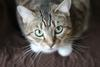
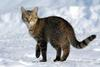
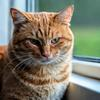
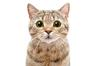
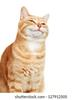
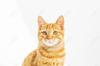
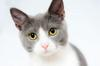
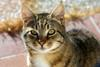
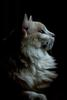

In [ ]:
def get_thumbnail(path):
    image = Image.open(path)
    image.thumbnail((100, 100), Image.LANCZOS)
    return image
  

def getimage_base64(img):
    if isinstance(img, str):
        img = get_thumbnail(img)
    with BytesIO() as buffer:
        img.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def get_image_html_tag(img, height=100, width=100):
    return f'<img style="display:block; margin-left:auto; margin-right:auto; height:{height}px; width:{width}px;" src="data:image/jpeg;base64,{getimage_base64(img)}">'
  
def get_image_info(folder_path):
  image_data = []

  for root, dirs, files in os.walk(folder_path):
    for file in files:
      file_path = os.path.join(root, file)
      try:
        with Image.open(file_path) as img:
          file_info = {
            'file_name': file,
            'color_model': img.mode,
            'format': img.format,
            'channels': len(img.getbands()),
            'file_size_mb': round(os.path.getsize(file_path) / (1024 * 1024), 2),
            'width': img.width,
            'height': img.height,
            'full_path': file_path,
            'thumbnail': get_thumbnail(file_path)
          }
          image_data.append(file_info)
      except IOError:
        continue

  df = pd.DataFrame(image_data)
  return df

df = get_image_info('./images')

HTML(df.to_html(formatters={'thumbnail': get_image_html_tag}, escape=False))


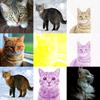

In [11]:
import random
from PIL import Image, ImageEnhance, ImageOps

def crop_to_square(image):
  width, height = image.size
  new_edge = min(width, height)
  left = (width - new_edge) / 2
  top = (height - new_edge) / 2
  right = (width + new_edge) / 2
  bottom = (height + new_edge) / 2
  return image.crop((left, top, right, bottom))

def apply_random_filter(image):
  filters = [
    ImageEnhance.Color(image).enhance(2),  # Red
    ImageEnhance.Color(image).enhance(0.5),  # Green
    ImageEnhance.Color(image).enhance(1.5),  # Blue
    ImageOps.colorize(image.convert("L"), black="yellow", white="white"),  # Yellow
    ImageOps.colorize(image.convert("L"), black="purple", white="white"),  # Purple
    ImageOps.colorize(image.convert("L"), black="cyan", white="white")  # Cyan
  ]
  return random.choice(filters)

def create_poster(folder_path, output_image_name, num_rows, num_cols):
  images = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('png', 'jpg', 'jpeg'))]
  poster_width = num_cols * 500
  poster_height = num_rows * 500
  poster = Image.new('RGB', (poster_width, poster_height))

  for row in range(num_rows):
    for col in range(num_cols):
      img_path = random.choice(images)
      with Image.open(img_path) as img:
        img = crop_to_square(img)
        img = img.resize((500, 500))
        img = apply_random_filter(img)
        poster.paste(img, (col * 500, row * 500))

  poster.save(output_image_name)

create_poster('./images', './out.png', 3, 3)

# For some reason the image query is not that good in output down below
# For better quality, check an image in ./out.png
HTML(get_image_html_tag('./out.png', 200, 200))